In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## Importing Necessary Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from time import time
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Reading the Dataset

In [117]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')

## Having a look at the first five rows of the train dataset

In [118]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Reading the Test Dataset

In [119]:
titanic1 = pd.read_csv('/kaggle/input/titanic/test.csv')

## Having a look at the first five rows of the test dataset

In [120]:
titanic1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [121]:
titanic.shape

(891, 12)

In [122]:
titanic1.shape

(418, 11)

## Checking the columns of the two dataframes

In [123]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
titanic1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- From the above outputs I can say that there are no unwanted spaces between the names of the attributes

## Having a look at the summary statistics

In [125]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
titanic1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- From the above summary statistics of both train and test datasets I can say that there are some missing values in Age column in titanic dataframe and there are some missing values in Age,Fare columns of titanic1 dataframe

## Checking the Datatypes of the train dataset

In [127]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value Analysis

In [128]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
titanic1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- From the above outputs it is clear that there are missing values in the Age,Cabin,Embarked in df dataframe and df_1 dataframe has missing values in Age,Cabin,Fare columns

## Filling the missing values of Age column in both data frames

In [130]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [131]:
titanic1['Age'] = titanic1['Age'].fillna(titanic1['Age'].mean())

## Now checking whether the missing values for Age is imputed or not

In [132]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
titanic1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- From the two outputs above I can clearly say that the missing values for Age columns have been imputed

## Filling the missing value in the Fare column of the titanic1 dataframe

In [134]:
titanic1['Fare'] = titanic1['Fare'].fillna(titanic1['Fare'].median())

## Now Checking whether missing values for Fare Column of titanic1 Dataframe is imputed or not

In [135]:
titanic1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [136]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Filling the Missing Values for Cabin Column

In [137]:
titanic['Cabin'] = titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])

In [138]:
titanic1['Cabin'] = titanic1['Cabin'].fillna(titanic1['Cabin'].mode()[0])

## Now Checking whether the Missing Values for Cabin have been imputed or not

In [139]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [140]:
titanic1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

- From the above outputs it is clear that there are 2 missing values in Embarked column of titanic dataframe

In [141]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

## Now checking whether the missing values of embarked column is imputed or not

In [142]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

- From the above output It is clear that all the missing values for both the dataframes are imputed

## Univariate Analysis on the Target variable

In [143]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- From the above output I can say that out of 891, **549 were not survived where as 342 survived**
- I can also say that the data is imbalanced

## Checking the percentage of people survived  and the percentage of people did not survive

In [144]:
titanic['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

- From the above output I can say that **61% of the people did not Survive** and remaining **survived**

## Percentage of women Survived

In [145]:
women = titanic.loc[titanic.Sex == 'female']["Survived"]
survival_rate_women = sum(women)/len(women)
print("% of women who survived:", survival_rate_women)

% of women who survived: 0.7420382165605095


- From the above output 71% of the women survived

In [146]:
men = titanic.loc[titanic.Sex == 'male']["Survived"]
survival_rate_men = sum(men)/len(men)
print("% of men who survived:", survival_rate_men)

% of men who survived: 0.18890814558058924


- From the above output I can say that 18.8% of men Survived

## Representing the no.of people survived and not survived Graphically

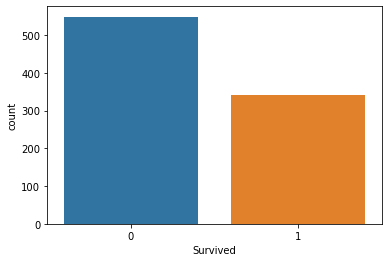

In [147]:
sns.countplot(titanic['Survived'])

## Outlier Analysis

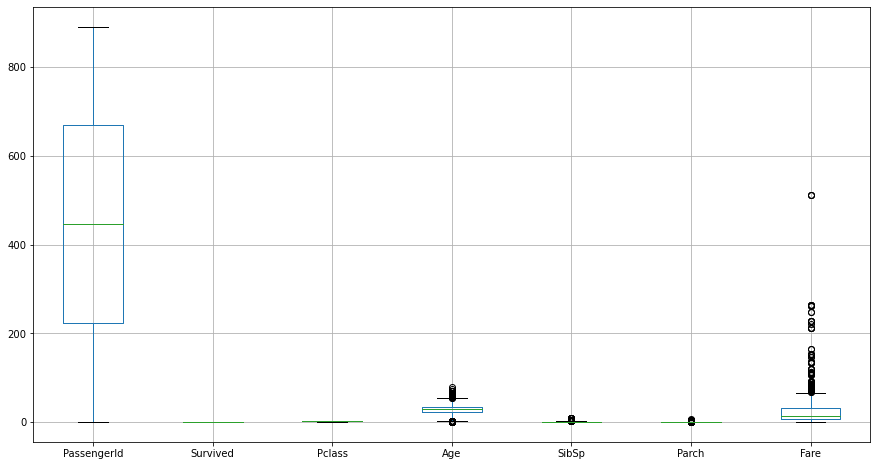

In [148]:
plt.figure(figsize=(15,8))
titanic.boxplot()

- From the above output I can say that there are some outliers in the following columns:
*Age,
SibSp,
Parch,
Fare.*

## Treating Outliers for Age,SibSp,Parch,Fare columns respectively

In [149]:
q = int(titanic['Age'].quantile(0.25))
q = int(titanic['Age'].quantile(0.9))

In [150]:
titanic[titanic['Age']>q]['Age'].count()

89

In [151]:
titanic[titanic['Age']<q]['Age'].count()

793

In [152]:
titanic['Age'] = np.where(titanic['Age']>q,q,titanic['Age'])
titanic['Age'] = np.where(titanic['Age']<q,q,titanic['Age'])

In [153]:
q = int(titanic['SibSp'].quantile(0.25))
q = int(titanic['SibSp'].quantile(0.9))

In [154]:
titanic[titanic['SibSp']>q]['SibSp'].count()

74

In [155]:
titanic[titanic['SibSp']<q]['SibSp'].count()

608

In [156]:
titanic['SibSp'] = np.where(titanic['SibSp']>q,q,titanic['SibSp'])
titanic['SibSp'] = np.where(titanic['SibSp']<q,q,titanic['SibSp'])

In [157]:
q = int(titanic['Parch'].quantile(0.25))
q = int(titanic['Parch'].quantile(0.9))

In [158]:
titanic[titanic['Parch']>q]['Parch'].count()

15

In [159]:
titanic[titanic['Parch']<q]['Parch'].count()

796

In [160]:
titanic['Parch'] = np.where(titanic['Parch']>q,q,titanic['Parch'])
titanic['Parch'] = np.where(titanic['Parch']<q,q,titanic['Parch'])

In [161]:
q = int(titanic['Fare'].quantile(0.25))
q = int(titanic['Fare'].quantile(0.99))

In [162]:
titanic[titanic['Fare']>q]['Fare'].count()

9

In [163]:
titanic[titanic['Fare']<q]['Fare'].count()

882

In [164]:
titanic['Fare'] = np.where(titanic['Fare']>q,q,titanic['Fare'])
titanic['Fare'] = np.where(titanic['Fare']<q,q,titanic['Fare'])

## Checking whether outliers are treated

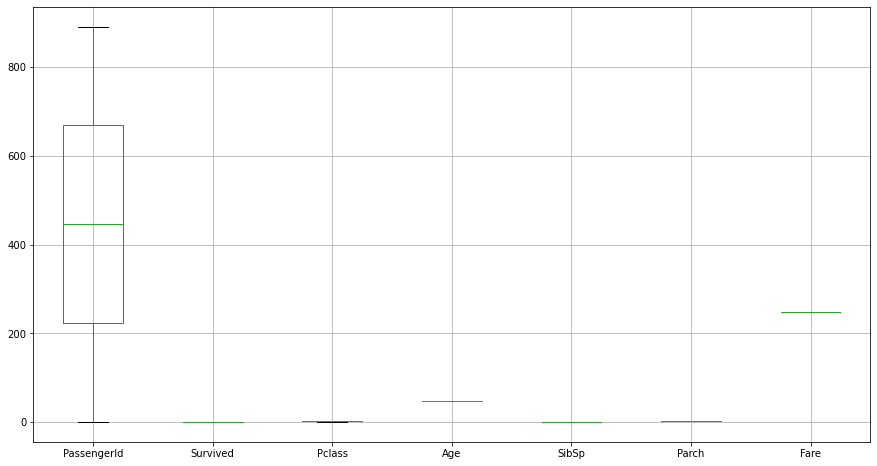

In [165]:
plt.figure(figsize=(15,8))
titanic.boxplot()

- From the above output It is clear that all the outliers have been treated

## Bivariate Analysis

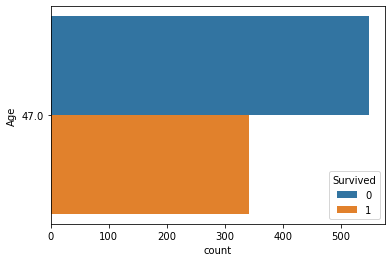

In [166]:
## checking how many people survived based on Age
sns.countplot(y=titanic['Age'],hue=titanic['Survived'])

In [167]:
titanic.groupby('Survived')['Age'].value_counts()

Survived  Age 
0         47.0    549
1         47.0    342
Name: Age, dtype: int64

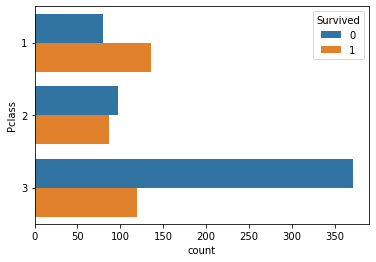

In [168]:
## checking how many people survived based on Pclass
sns.countplot(y=titanic['Pclass'],hue=titanic['Survived'])

In [169]:
titanic.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

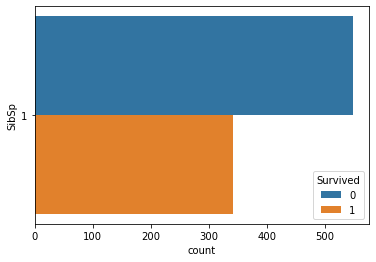

In [170]:
## checking how many people survived based on SibSp
sns.countplot(y=titanic['SibSp'],hue=titanic['Survived'])

In [171]:
titanic.groupby('SibSp')['Survived'].value_counts()

SibSp  Survived
1      0           549
       1           342
Name: Survived, dtype: int64

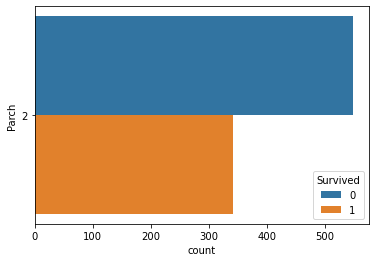

In [172]:
## checking how many people survived based on Parch
sns.countplot(y=titanic['Parch'],hue=titanic['Survived'])

In [173]:
titanic.groupby('Parch')['Survived'].value_counts()

Parch  Survived
2      0           549
       1           342
Name: Survived, dtype: int64

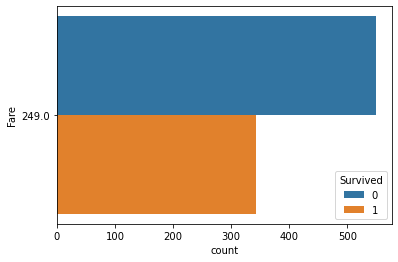

In [174]:
## checking how many people survived based on Parch
sns.countplot(y=titanic['Fare'],hue=titanic['Survived'])

In [175]:
titanic.groupby('Fare')['Survived'].value_counts()

Fare   Survived
249.0  0           549
       1           342
Name: Survived, dtype: int64

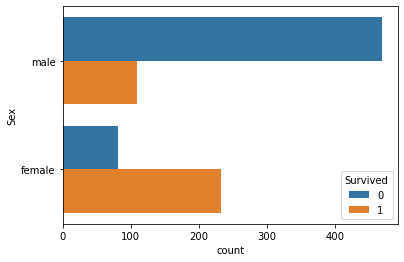

In [176]:
sns.countplot(y=titanic['Sex'],hue=titanic['Survived'])

In [177]:
titanic.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

## From the above Bivariate Analysis I can Infer the following:

**- The People who are in the range of 40-50 years the mortality is high**

**- The people who belong to Pclass-2 the mortality is high**

**- The people who have parents and children of maximum upto 2 the mortality is high**

**- The people who bought a ticket for 249 dollars the mortality is high**

**- From the above graph I can say that the mortality is high where sex is Female **

## Encoding the categorical variables (Sex column Label Encoded)

In [178]:

le = LabelEncoder()
for column in titanic.columns:
    if titanic[column].dtype == type(object):
        titanic[column] = le.fit_transform(titanic[column])

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,47.0,1,2,523,249.0,47,2
1,2,1,1,190,0,47.0,1,2,596,249.0,81,0
2,3,1,3,353,0,47.0,1,2,669,249.0,47,2
3,4,1,1,272,0,47.0,1,2,49,249.0,55,2
4,5,0,3,15,1,47.0,1,2,472,249.0,47,2
5,6,0,3,554,1,47.0,1,2,275,249.0,47,1
6,7,0,1,515,1,47.0,1,2,85,249.0,129,2
7,8,0,3,624,1,47.0,1,2,395,249.0,47,2
8,9,1,3,412,0,47.0,1,2,344,249.0,47,2
9,10,1,2,576,0,47.0,1,2,132,249.0,47,0


## Model Development

In [179]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

## Train-Test Split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0) 

In [181]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,3,99,0,47.0,1,2,203,249.0,47,0
439,440,2,447,1,47.0,1,2,547,249.0,47,2
817,818,2,504,1,47.0,1,2,618,249.0,47,0
378,379,3,85,1,47.0,1,2,183,249.0,47,0
491,492,3,871,1,47.0,1,2,649,249.0,47,2


In [182]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,3,880,1,47.0,1,2,176,249.0,47,0
648,649,3,865,1,47.0,1,2,620,249.0,47,2
278,279,3,681,1,47.0,1,2,480,249.0,47,1
31,32,1,776,0,47.0,1,2,586,249.0,41,0
255,256,3,819,0,47.0,1,2,185,249.0,47,0


In [183]:
y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [184]:
y_test.head()

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64

## Logistic Regression

In [185]:
classifier_log = LogisticRegression()
model = classifier_log.fit(X_train,y_train)

In [186]:
#predicting on the test data
y_pred_log = classifier_log.predict(X_test)

In [187]:
#checking the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log,y_test)*100)

80.44692737430168


In [188]:
probs_log = classifier_log.predict_proba(X_test)

In [189]:
probs_log

array([[0.84346117, 0.15653883],
       [0.92955715, 0.07044285],
       [0.89045089, 0.10954911],
       [0.13502388, 0.86497612],
       [0.30806777, 0.69193223],
       [0.6457166 , 0.3542834 ],
       [0.18833825, 0.81166175],
       [0.15479312, 0.84520688],
       [0.48512615, 0.51487385],
       [0.28230284, 0.71769716],
       [0.89457768, 0.10542232],
       [0.27762344, 0.72237656],
       [0.88047164, 0.11952836],
       [0.29329462, 0.70670538],
       [0.05967518, 0.94032482],
       [0.47432153, 0.52567847],
       [0.91228949, 0.08771051],
       [0.84060489, 0.15939511],
       [0.88689957, 0.11310043],
       [0.84090715, 0.15909285],
       [0.73588   , 0.26412   ],
       [0.10766081, 0.89233919],
       [0.87893899, 0.12106101],
       [0.57700197, 0.42299803],
       [0.49489634, 0.50510366],
       [0.0484886 , 0.9515114 ],
       [0.90573177, 0.09426823],
       [0.43047107, 0.56952893],
       [0.25695696, 0.74304304],
       [0.45714598, 0.54285402],
       [0.

## Decision Tree Classifier

In [190]:
classifier_tree = DecisionTreeClassifier()
model = classifier_tree.fit(X_train,y_train)

In [191]:
# predicting the test data
y_pred_tree = classifier_tree.predict(X_test)

In [192]:
print(accuracy_score(y_pred_tree,y_test)*100)

84.35754189944134


[Text(243.80602134146343, 532.275, 'Sex <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(77.57560975609756, 509.625, 'Pclass <= 2.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(31.982926829268294, 486.975, 'Name <= 879.0\ngini = 0.114\nsamples = 132\nvalue = [8, 124]'),
 Text(26.539024390243906, 464.32500000000005, 'Name <= 25.5\ngini = 0.101\nsamples = 131\nvalue = [7, 124]'),
 Text(10.887804878048781, 441.675, 'PassengerId <= 615.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(5.443902439024391, 419.025, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(16.33170731707317, 419.025, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(42.19024390243903, 441.675, 'Cabin <= 135.5\ngini = 0.076\nsamples = 127\nvalue = [5, 122]'),
 Text(27.219512195121954, 419.025, 'PassengerId <= 43.0\ngini = 0.063\nsamples = 122\nvalue = [4, 118]'),
 Text(13.609756097560977, 396.375, 'Name <= 701.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(8.165853658536586, 373.725, 

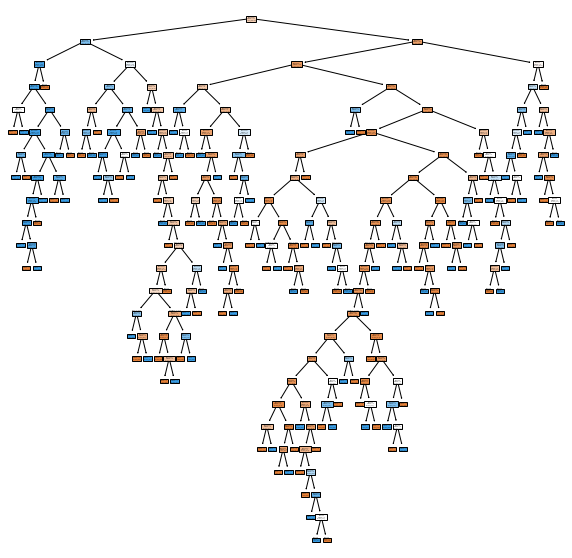

In [193]:
features  = X_test.columns
plt.figure(figsize=(10,10))
plot_tree(classifier_tree, feature_names=features,filled = True)

In [194]:
bnb = BernoulliNB() 

In [195]:
print("Start training...")
tStart = time()
bnb.fit(X_train, y_train)
tEnd = time()
print("Training time: ", round(tEnd-tStart, 3), "s")

# making predictions on the testing set 
y_pred = bnb.predict(X_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)


Start training...
Training time:  0.003 s
Accuracy:  78.77094972067039


In [196]:
CM=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", CM, sep='\n') 

Confusion Matrix is:
[[92 18]
 [20 49]]


In [197]:
CM=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", CM, sep='\n') 

print("----------")
print("   TN FP")
print("   FN TP")



print("----------")

TN = 92
TP = 49
FN = 20
FP = 18

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print("The probability of predicting people surviving correctly is ",specificity)
print("The probability of predicting people not surviving correctly is ",sensitivity)


Confusion Matrix is:
[[92 18]
 [20 49]]
----------
   TN FP
   FN TP
----------
The probability of predicting people surviving correctly is  0.8363636363636363
The probability of predicting people not surviving correctly is  0.7101449275362319


In [198]:
y_pred_NB = bnb.predict(X_test)

In [199]:
y_pred_NB.shape

(179,)

## Bagging Classifier

In [200]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [201]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [202]:
#Average number of correct predictions
clf.score(X_test,y_test)

0.8324022346368715

In [203]:
clf.oob_score_

0.7752808988764045

In [204]:
set(range(100,200,20))

{100, 120, 140, 160, 180}

In [205]:
#Parameter tuning
for w in range(100,200,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 100
OOB score is 0.7879213483146067
************************
For n_estimators = 120
OOB score is 0.7921348314606742
************************
For n_estimators = 140
OOB score is 0.7991573033707865
************************
For n_estimators = 160
OOB score is 0.7949438202247191
************************
For n_estimators = 180
OOB score is 0.800561797752809
************************


In [206]:
#Finalizing on a tree model with 180 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=180,random_state=400,
                      base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [207]:
clf_bagging  = clf.predict(X_test)

In [208]:
clf_bagging.shape

(179,)

In [209]:
#Average Number of correct predictions
clf.score(X_test,y_test) 

0.8268156424581006

In [210]:
# Feature Importance
len(clf.estimators_)

180

In [211]:
# We can extract feature importance from each tree then take a mean for all trees
import numpy as np
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_) #feature importance at each tree

In [212]:
imp

[array([0.22923583, 0.09599552, 0.24749502, 0.23842346, 0.        ,
        0.        , 0.        , 0.10537799, 0.        , 0.04032616,
        0.04314603]),
 array([0.14476725, 0.09103136, 0.15784724, 0.24796327, 0.        ,
        0.        , 0.        , 0.24923023, 0.        , 0.05724999,
        0.05191066]),
 array([0.15316034, 0.06388447, 0.23167247, 0.27108444, 0.        ,
        0.        , 0.        , 0.17270091, 0.        , 0.08955685,
        0.01794052]),
 array([0.14009353, 0.0833256 , 0.18525593, 0.31700499, 0.        ,
        0.        , 0.        , 0.21032117, 0.        , 0.0444147 ,
        0.01958409]),
 array([0.13618712, 0.04642751, 0.22638281, 0.31787832, 0.        ,
        0.        , 0.        , 0.17741307, 0.        , 0.07457077,
        0.02114039]),
 array([0.18566656, 0.05739953, 0.20565432, 0.29078555, 0.        ,
        0.        , 0.        , 0.17322455, 0.        , 0.07585227,
        0.01141721]),
 array([0.15550686, 0.04194924, 0.21555033, 0.316218

In [213]:
imp=np.mean(imp,axis=0)
imp

array([0.15495758, 0.07726987, 0.20055269, 0.29244517, 0.        ,
       0.        , 0.        , 0.1808309 , 0.        , 0.06800173,
       0.02594205])

In [214]:
feature_importance=pd.Series(imp,index=X.columns.tolist()).sort_values(ascending=False)
feature_importance

Sex            0.292445
Name           0.200553
Ticket         0.180831
PassengerId    0.154958
Pclass         0.077270
Cabin          0.068002
Embarked       0.025942
Fare           0.000000
Parch          0.000000
SibSp          0.000000
Age            0.000000
dtype: float64

## Random Forest Classifier: Bootstrap sampling + Feature sampling

In [215]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [216]:
clf.oob_score_

0.8075842696629213

In [217]:
for w in range(50,300,10):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 50
OOB score is 0.7963483146067416
************************
For n_estimators = 60
OOB score is 0.7991573033707865
************************
For n_estimators = 70
OOB score is 0.797752808988764
************************
For n_estimators = 80
OOB score is 0.8075842696629213
************************
For n_estimators = 90
OOB score is 0.7991573033707865
************************
For n_estimators = 100
OOB score is 0.800561797752809
************************
For n_estimators = 110
OOB score is 0.800561797752809
************************
For n_estimators = 120
OOB score is 0.8033707865168539
************************
For n_estimators = 130
OOB score is 0.800561797752809
************************
For n_estimators = 140
OOB score is 0.797752808988764
************************
For n_estimators = 150
OOB score is 0.800561797752809
************************
For n_estimators = 160
OOB score is 0.7991573033707865
************************
For n_estimators = 170
OOB score is 0.7991573033707

In [218]:
#Finalize 80 trees
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400,max_depth=3,max_features=4)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [219]:
clf.score(X_test,y_test)

0.8324022346368715

In [220]:
#Area Under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.896772068511199

In [221]:
clf.feature_importances_

array([0.03143597, 0.1523627 , 0.04909934, 0.51634561, 0.        ,
       0.        , 0.        , 0.12729188, 0.        , 0.10442931,
       0.01903519])

In [222]:
clf_rf = clf.predict(X_test)

In [223]:
clf_rf.shape

(179,)

In [224]:
pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Sex            0.516346
Pclass         0.152363
Ticket         0.127292
Cabin          0.104429
Name           0.049099
PassengerId    0.031436
Embarked       0.019035
Fare           0.000000
Parch          0.000000
SibSp          0.000000
Age            0.000000
dtype: float64

## Boosting classifier: Trees are grown sequentially: each tree is grown using information from previously grown trees.

In [225]:
clf=AdaBoostClassifier(n_estimators=50,random_state=400)
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=400)

In [226]:
clf.score(X_test,y_test)

0.8324022346368715

In [227]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [228]:
clf.score(X_test,y_test)

0.8324022346368715

In [229]:
from sklearn.model_selection import GridSearchCV
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]},cv=3) 
mod.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
          

In [230]:
mod.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [231]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [232]:
clf.score(X_test,y_test)

0.8324022346368715

## XGboost is focused towards

## - Computational Speed
## - Model performance

In [233]:
import xgboost as xg
xgb=xg.XGBClassifier(objective='binary:logistic',reg_lambda=0.2,max_depth=4,random_state=200) #L2 regularization

In [234]:
#Grid Search CV: Parameter tuning
from sklearn import model_selection
xgb=model_selection.GridSearchCV(xgb, param_grid={'max_depth':[2,3,5,9],'n_estimators':[50,100,150,500],'reg_lambda':[0.1,0.2]})
xgb.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=4, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=200, reg_alpha=None,
                                     reg_lambda=0.2, scale_pos_weight=None,
                                     subsample=None, tree_method=None,

In [235]:
xgb.best_params_

{'max_depth': 2, 'n_estimators': 100, 'reg_lambda': 0.1}

In [236]:
xgb.score(X_test,y_test)

0.8324022346368715

In [237]:
from sklearn import metrics
metrics.roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])

0.8720685111989459

In [241]:
from sklearn.ensemble import RandomForestClassifier

y = titanic["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
X = pd.get_dummies(titanic[features])
X_test = pd.get_dummies(titanic[features])

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_X = my_imputer.fit_transform(X)
imputed_X_test = my_imputer.transform(X_test)

model = RandomForestClassifier(n_estimators=6, max_depth=20, random_state=1)
model.fit(imputed_X, y)
predictions = model.predict(imputed_X_test)

output = pd.DataFrame({'PassengerId': titanic.PassengerId, 'Survived': predictions})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
